In [1]:
# !pip install matplotlib
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\HANBaekM.TTF' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

In [18]:
# 데이터 읽어오기
shopping_df = pd.read_csv('data/shopping_behavior_updated.csv')
shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


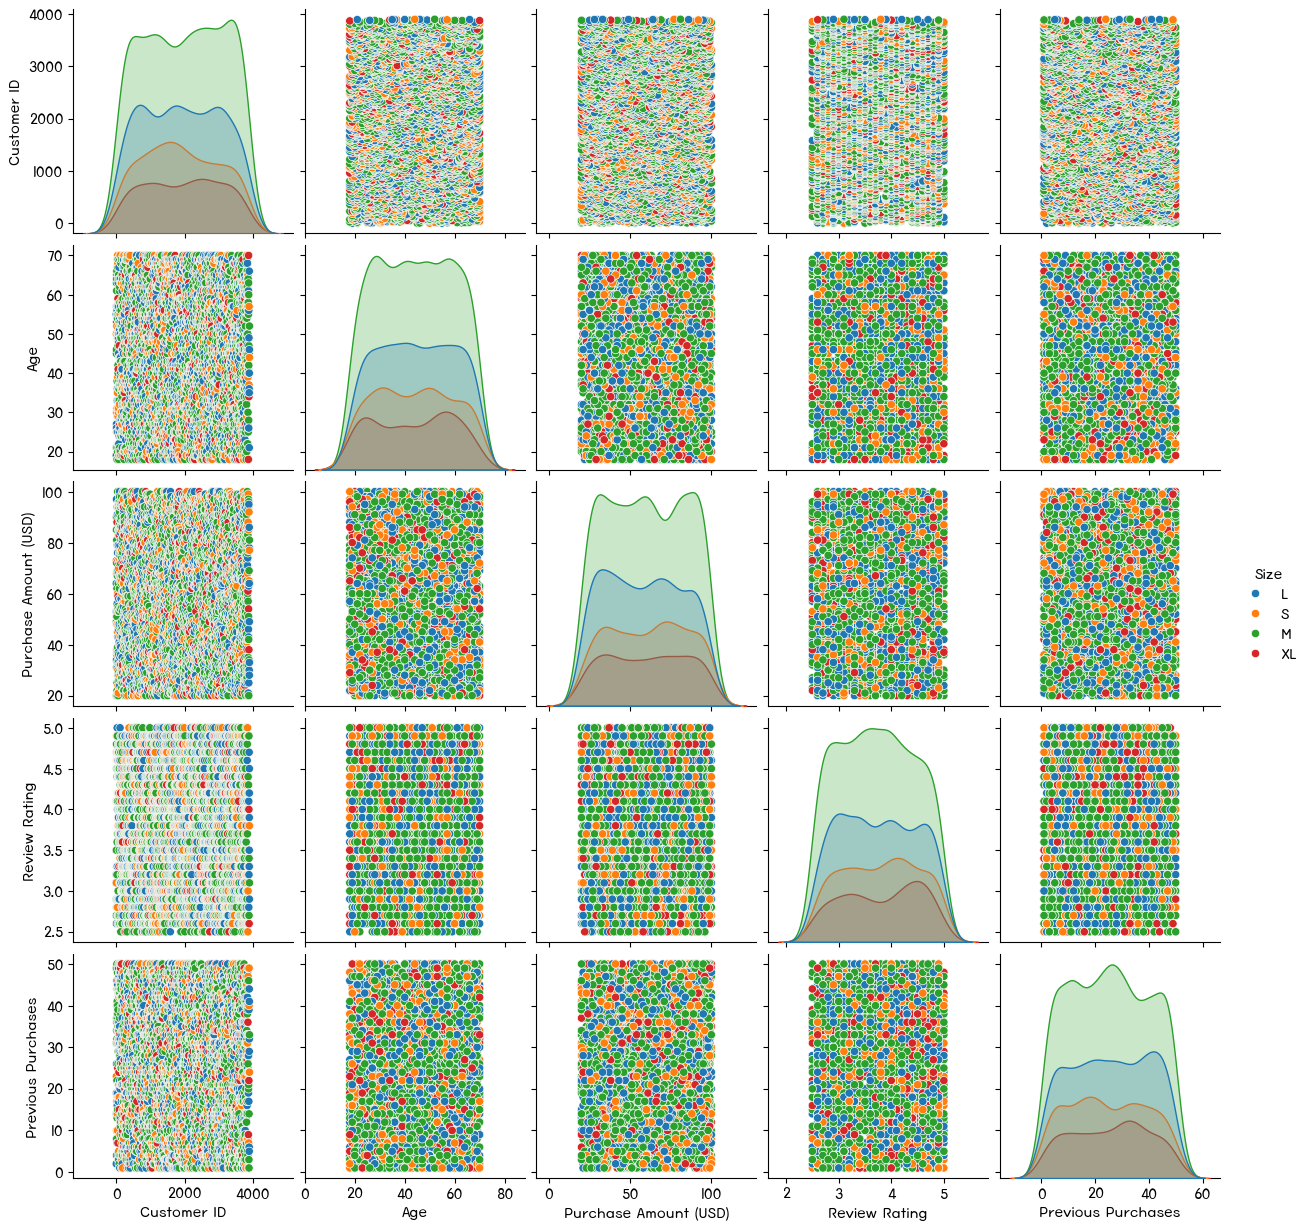

In [5]:
sns.pairplot(shopping_df, hue='Size')

plt.show()

In [6]:
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
shopping_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


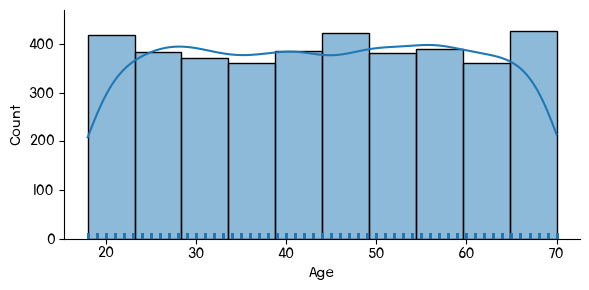

In [8]:
sns.displot(shopping_df['Age'], bins=10, height=3, aspect=2, rug=True, kde=True)

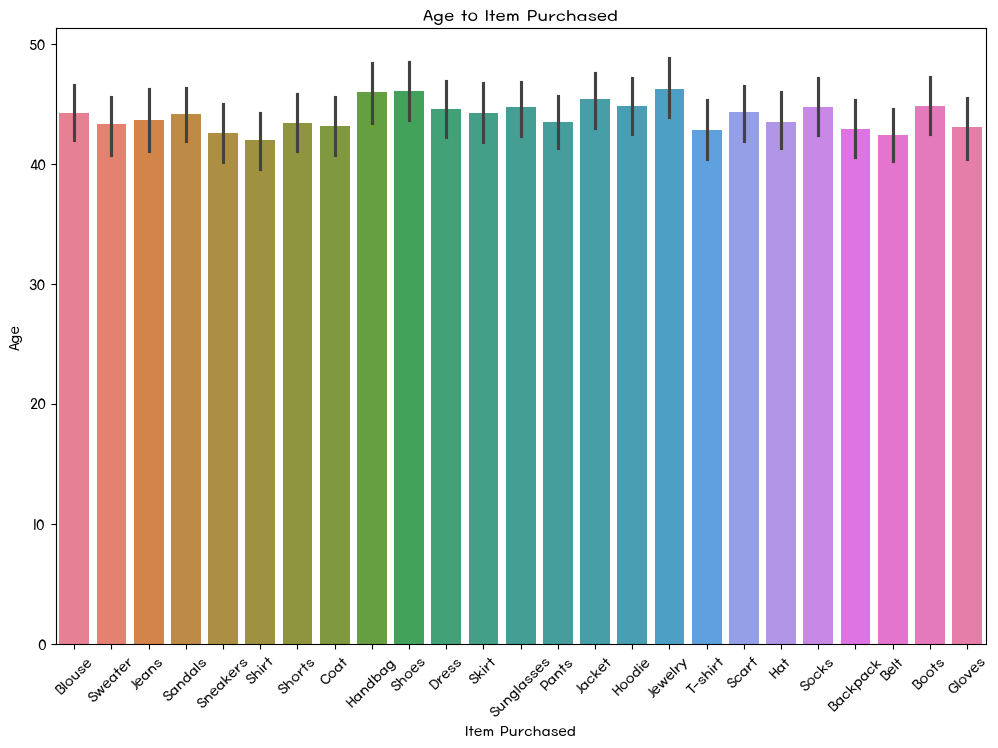

In [9]:
# 나이별 상품품목
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=shopping_df, x='Item Purchased', y='Age', hue='Item Purchased')
plt.xticks(rotation=45)
plt.title('Age to Item Purchased')
plt.show()

## 카테고리별 연령대 구매율

['Clothing' 'Footwear' 'Outerwear' 'Accessories']


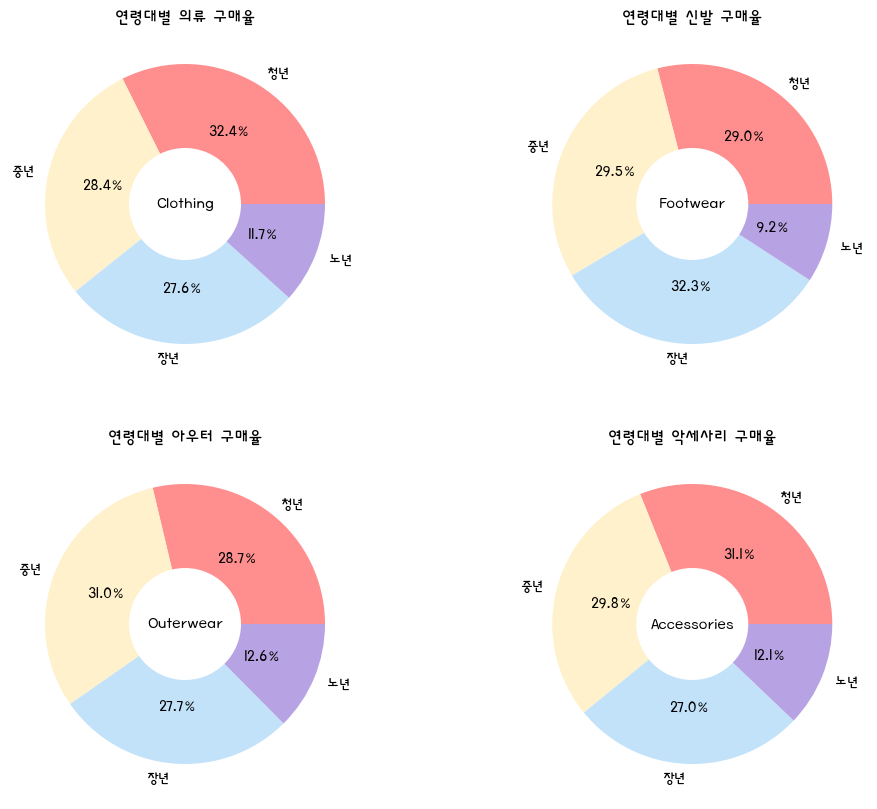

In [10]:
print(shopping_df['Category'].unique())

shopping_df['AgeGroup'] = pd.cut(shopping_df['Age'], 
                                 bins=[19, 35, 50, 64, shopping_df['Age'].max()],
                                 labels=['청년', '중년', '장년', '노년'],
                                 right=False)

# 카테고리별
clothing_df = shopping_df[shopping_df['Category'] == 'Clothing']
footwear_df = shopping_df[shopping_df['Category'] == 'Footwear']
outwear_df = shopping_df[shopping_df['Category'] == 'Outerwear']
accessories_df = shopping_df[shopping_df['Category'] == 'Accessories']

# 연령대별 
clothing_df_age = clothing_df['AgeGroup'].value_counts().sort_index()
footwear_df_age = footwear_df['AgeGroup'].value_counts().sort_index()
outwear_df_age = outwear_df['AgeGroup'].value_counts().sort_index()
accessories_df_age = accessories_df['AgeGroup'].value_counts().sort_index()


fig, ax = plt.subplots(2, 2, figsize=(12,10))

ax[0,0].pie(clothing_df_age, labels=clothing_df_age.index, autopct='%1.1f%%', 
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[0,0].set_title('연령대별 의류 구매율')
ax[0,0].text(0, 0, 'Clothing', ha='center', va='center')

ax[0,1].pie(footwear_df_age, labels=footwear_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[0,1].set_title('연령대별 신발 구매율')
ax[0,1].text(0, 0, 'Footwear', ha='center', va='center')

ax[1,0].pie(outwear_df_age, labels=outwear_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[1,0].set_title('연령대별 아우터 구매율')
ax[1,0].text(0, 0, 'Outerwear', ha='center', va='center')


ax[1,1].pie(accessories_df_age, labels=accessories_df_age.index, autopct='%1.1f%%',
            wedgeprops={'width' : 0.6},
            colors=['#FF8F8F', '#FFF1CB', '#C2E2FA', '#B7A3E3'])
ax[1,1].set_title('연령대별 악세사리 구매율')
ax[1,1].text(0, 0, 'Accessories', ha='center', va='center')

plt.show()

## 카테고리별 구매율

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


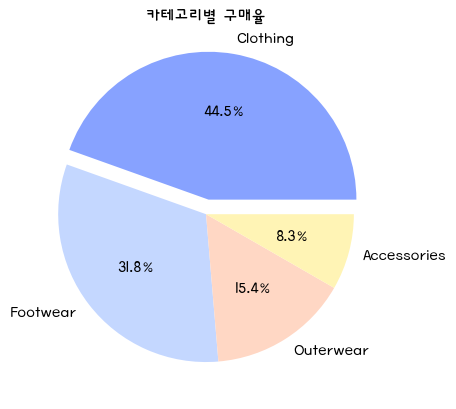

In [73]:
print(shopping_df['Category'].value_counts())

category_count = shopping_df['Category'].value_counts()

plt.pie(category_count, labels=shopping_df['Category'].unique(), 
        autopct='%1.1f%%', explode=[0.1, 0, 0, 0],
        colors=['#87A2FF', '#C4D7FF', '#FFD7C4', '#FFF4B5'])

plt.title('카테고리별 구매율')
plt.show()

## 카테고리별 남/여 구매수

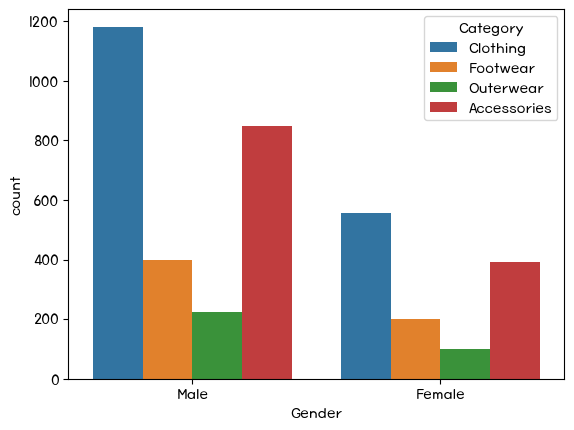

In [13]:
sns.countplot(data=shopping_df, x='Gender', hue='Category')
plt.show()


## 계절별 많이 구매한 상품품목

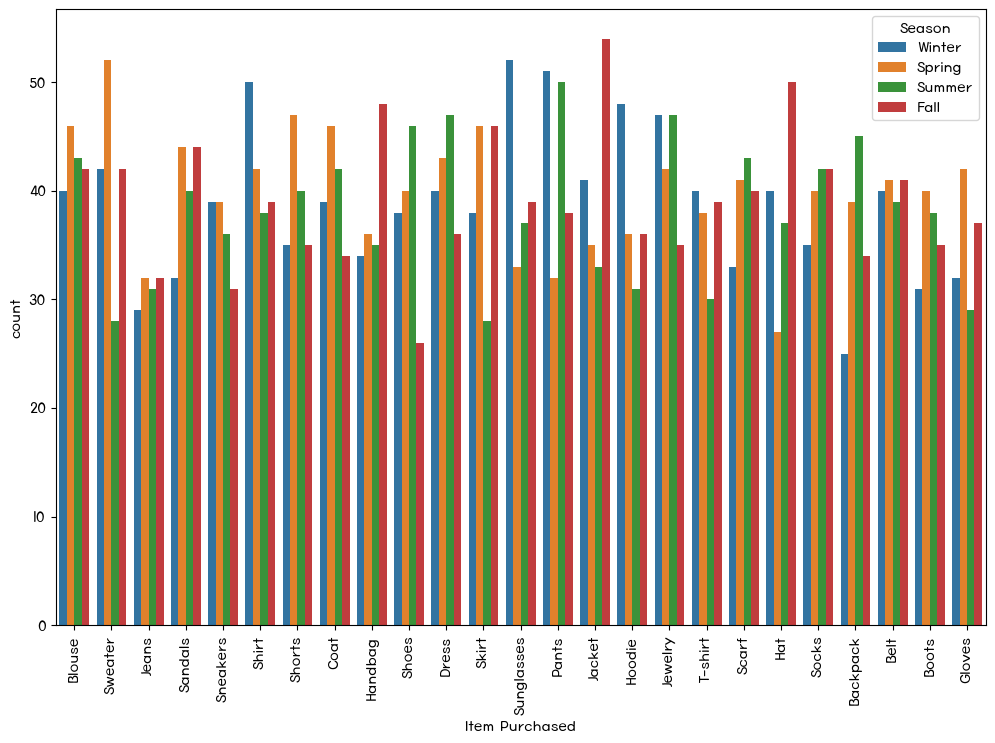

In [24]:
fig = plt.subplots(figsize=(12,8))
sns.countplot(data=shopping_df, x='Item Purchased', hue='Season')
plt.xticks(rotation=90)
plt.show()

['Winter' 'Spring' 'Summer' 'Fall']


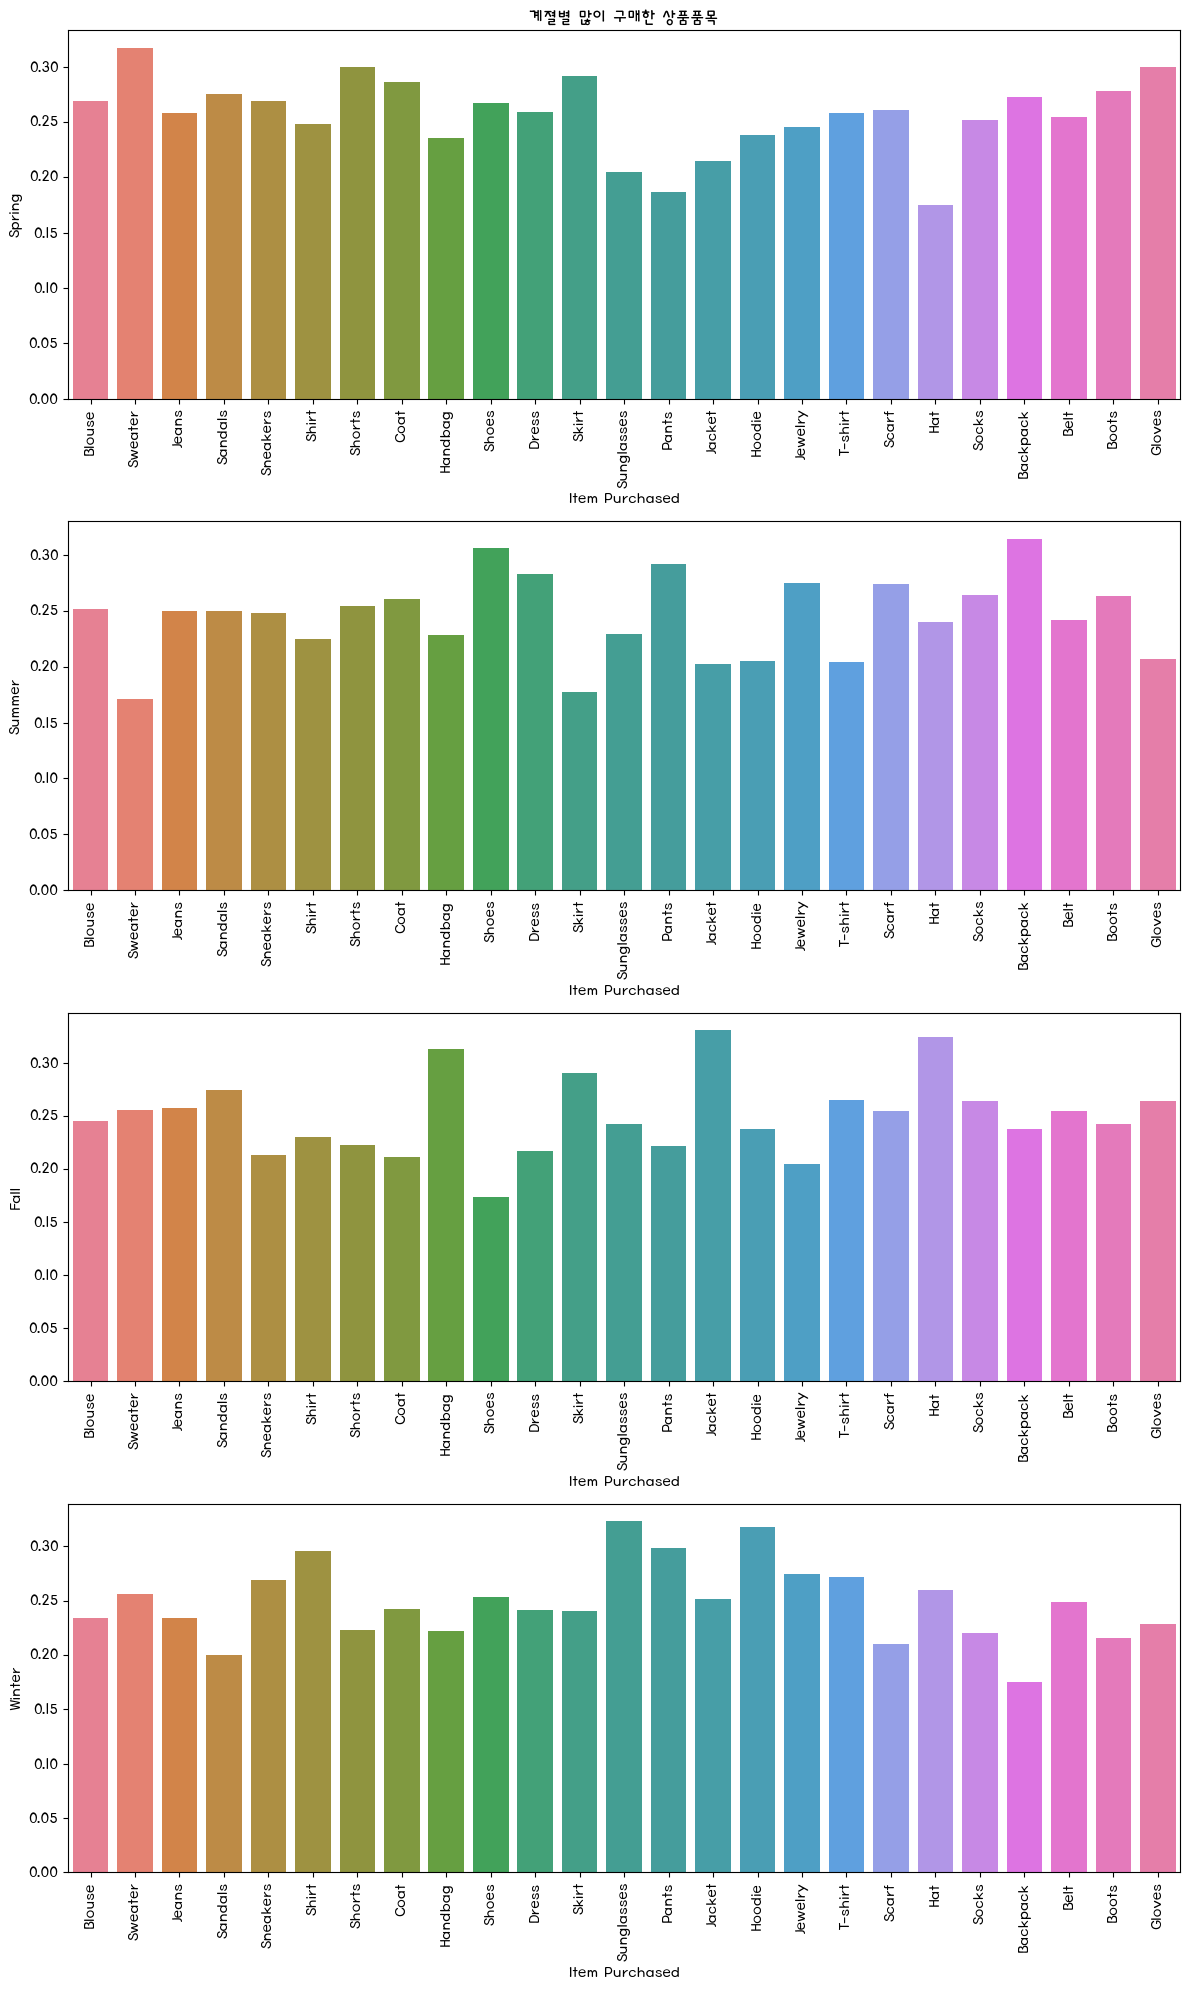

In [ ]:
print(shopping_df['Season'].unique())

spring = shopping_df['Season'] == 'Spring'
summer = shopping_df['Season'] == 'Summer'
fall = shopping_df['Season'] == 'Fall'
winter = shopping_df['Season'] == 'Winter'

fig, ax = plt.subplots(4, 1, figsize=(12,20))

# 봄
sns.barplot(data=shopping_df, x='Item Purchased', y=spring, errorbar=None, 
            hue='Item Purchased', ax=ax[0])
ax[0].set_ylabel('Spring')
ax[0].set_title('계졀별 많이 구매한 상품품목')
ax[0].tick_params(axis='x', rotation=90)

# 여름
sns.barplot(data=shopping_df, x='Item Purchased', y=summer, errorbar=None, 
            hue='Item Purchased', ax=ax[1])
ax[1].set_ylabel('Summer')
ax[1].tick_params(axis='x', rotation=90)

# 가을
sns.barplot(data=shopping_df, x='Item Purchased', y=fall, errorbar=None, 
            hue='Item Purchased', ax=ax[2])
ax[2].set_ylabel('Fall')
ax[2].tick_params(axis='x', rotation=90)

# 겨울
sns.barplot(data=shopping_df, x='Item Purchased', y=winter, errorbar=None, 
            hue='Item Purchased', ax=ax[3])
ax[3].set_ylabel('Winter')
ax[3].tick_params(axis='x', rotation=90)

# ax 간격 자동조절
plt.tight_layout()
plt.show()

## 

Color,Beige,Black,Blue,Brown,Charcoal,Cyan,Gold,Gray,Green,Indigo,...,Peach,Pink,Purple,Red,Silver,Teal,Turquoise,Violet,White,Yellow
Review Rating,,,,,,,,,,,,,,,,,,,,,
2.5점,25.461538,27.071429,22.529412,22.347826,26.500000,25.375000,27.928571,25.766667,25.033333,23.840000,...,28.735294,21.095238,25.761905,28.444444,27.000000,21.416667,23.461538,21.777778,29.000000,23.071429
3점,24.288889,27.107143,26.057143,30.533333,19.280000,26.378378,22.322581,27.909091,25.409091,24.162162,...,27.642857,24.758621,22.413793,26.545455,26.400000,25.931818,27.192308,21.659091,24.906250,23.370370
3.5점,26.406250,29.000000,21.269231,22.172414,24.120000,29.361111,24.724138,24.347826,23.433333,26.666667,...,25.476190,29.914286,23.322581,24.153846,27.000000,28.617647,28.285714,30.263158,25.705882,19.628571
4점,23.055556,22.256410,22.214286,29.620690,29.050000,25.400000,21.625000,31.833333,24.500000,25.000000,...,27.733333,22.297297,26.888889,26.121212,24.425000,24.282051,24.259259,25.466667,28.954545,27.322581
4.5점,24.807692,27.459459,25.857143,25.357143,21.133333,30.120000,25.166667,29.659574,25.120000,23.461538,...,25.545455,23.461538,25.884615,23.846154,27.870968,27.838710,26.300000,20.600000,31.333333,21.900000


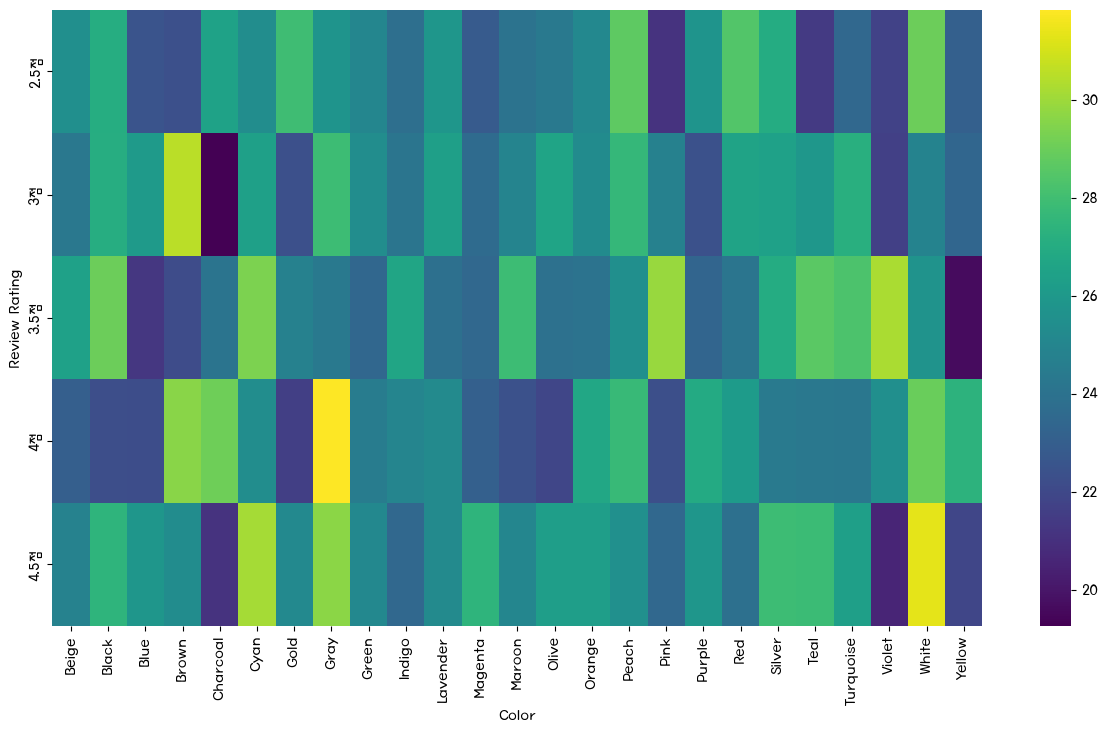

In [153]:
# 색상과 리뷰의 구매금액 교차분석
review_index = pd.cut(shopping_df['Review Rating'],
                      bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                      labels=['1점', '1.5점', '2점', '2.5점', '3점', '3.5점', '4점', '4.5점'],
                      right=False)

pivot_review_fre = shopping_df.pivot_table(index=review_index, columns='Color',
                                           values='Previous Purchases', observed=True)

display(pivot_review_fre)

# 히트맵으로 비교
fig = plt.subplots(figsize=(15,8))
sns.heatmap(pivot_review_fre, annot=False, cmap='viridis')
plt.show()

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Review Rating,,,,,,,
2.5점,58.600000,61.411765,59.465347,62.488095,55.785714,55.609091,57.000000
3점,57.991803,61.658333,60.477477,57.782258,57.201835,63.394958,60.920000
3.5점,56.931624,59.101010,59.983607,59.887850,61.316327,57.311927,58.543860
4점,64.427350,63.383333,62.085271,57.401869,59.495726,59.723404,55.892562
4.5점,62.303571,56.587629,57.517857,58.464286,62.500000,62.431034,62.715686


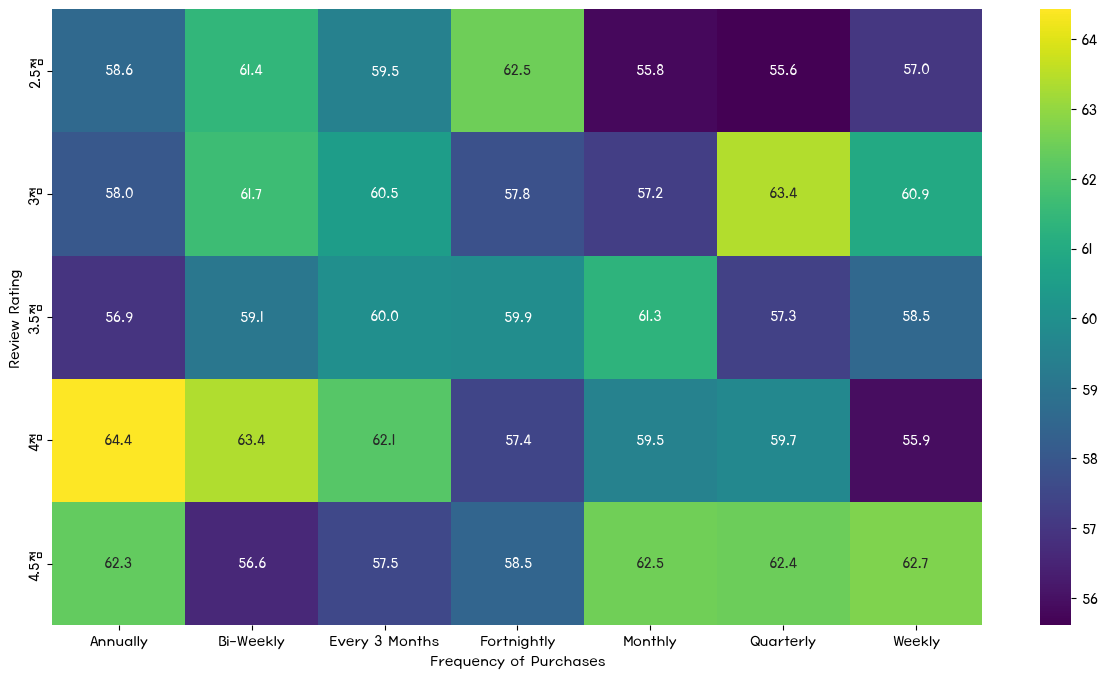

In [151]:
# 빈도수와 할인의 평균 구매금액 교차분석
review_index = pd.cut(shopping_df['Review Rating'],
                      bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                      labels=['1점', '1.5점', '2점', '2.5점', '3점', '3.5점', '4점', '4.5점'],
                      right=False)

pivot_review_fre = shopping_df.pivot_table(index=review_index, columns='Frequency of Purchases',
                                           values='Purchase Amount (USD)', observed=True)

display(pivot_review_fre)

# 히트맵으로 비교
fig = plt.subplots(figsize=(15,8))
sns.heatmap(pivot_review_fre, annot=True, cmap='viridis', fmt='.1f')
plt.show()